# COMP5318 - Machine Learning and Data Mining 

## Tutorial 6 - Logistic regession

**Semester 2, 2020**

**Objectives:**
* To learn about the "logistic regression" classifier.
* To learn about the using "logistic regression" classifier for MNIST dataset.


**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab6.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab6.ipynb" file
* Complete exercises in "lab6.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.


Lecturers: Nguyen Hoang Tran 

Tutors: Canh Dinh, Chen Chen, Claire Hardgrove, Fengxiang He, Henry Weld, Yixuan Zhang, Zhiyi Wang, Thomas Selvaraj.

## 1. Logistic Regression

Let us consider an $D$ dimensional input array $\mathbf{x}_{\text{orig}}$ and a corresponding output array $\mathbf{y}$. 
\begin{equation}
   \mathbf{x}_{\text{orig}} = \left( 
    \begin{array}{cccc}
        x_{11} & x_{12} & \cdots & x_{1D} \\
        x_{21} & x_{22} & \cdots & x_{2D} \\
        \vdots & \vdots & \ddots & \vdots \\
        x_{N1} & x_{N2} & \cdots & x_{ND} \\
     \end{array} 
     \right)
\end{equation}

\begin{equation}
   \mathbf{y} = \left( 
    \begin{array}{c}
        y_{1}  \\
        y_{2}  \\
        \vdots \\
        y_{N}  \\
     \end{array} 
     \right)
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

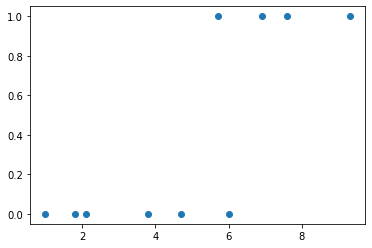

In [2]:
X_orig = np.array([1.0, 1.8, 2.1, 3.8, 4.7, 6.0, 5.7, 6.9, 7.6, 9.3])[:, np.newaxis] #input - column vector
y = np.array([0]*6 + [1]*4)[:, np.newaxis] #output - column vector

pl.scatter(X_orig, y)

Let us augment the input matrix with a $1 \times N$ constant array,
\begin{equation}
   \mathbf{x} = \left( 
    \begin{array}{ccccc}
        \color{blue}{1} & x_{11} & x_{12} & \cdots & x_{1D} \\
        \color{blue}{1} & x_{21} & x_{22} & \cdots & x_{2D} \\
        \color{blue}{\vdots} & \vdots & \vdots & \ddots & \vdots \\
        \color{blue}{1} & x_{N1} & x_{N2} & \cdots & x_{ND} \\
     \end{array} 
     \right)_{\big(N \times \color{red}{(D+1)} \big)}
\end{equation}

In [3]:
def extend_to_intercept(x):
    return np.hstack((np.ones((x.shape[0],1)), x))

X = extend_to_intercept(X_orig)
print(X)

[[1.  1. ]
 [1.  1.8]
 [1.  2.1]
 [1.  3.8]
 [1.  4.7]
 [1.  6. ]
 [1.  5.7]
 [1.  6.9]
 [1.  7.6]
 [1.  9.3]]


By considering an arbitrary weight vector,
\begin{equation}
   \mathbf{w} = \left( 
    \begin{array}{c}
        w_{1}  \\
        w_{2}  \\
        \vdots \\
        w_{\color{red}{D+1}}  \\
     \end{array} 
     \right)
\end{equation},

it is possible to build a linear model, 

\begin{equation}
 \color{blue}{ z_i =  \mathbf{x}_i \cdot \mathbf{w}_i } = w_0 + x_{i1} w_1 + x_{i2} w_2 + \cdots + x_{i(D+1)} w_{i(D+1)}
\end{equation}
for $i={1,...,N}$

Let us equate the linear model to a probability $p(x)$ with logistic transformation applied.
\begin{equation}
    \log \Big( \frac{p(\mathbf{x}_i)}{1-p(\mathbf{x}_i)} \Big) = \mathbf{x}_i \cdot \mathbf{w}_i  = z_i
\end{equation}

Therefore,
\begin{equation}
    p(\mathbf{x}_i; w) = \frac{e^{z_i}}{1+e^{z_i}}
            = \frac{1}{1+e^{-z_i}}
\end{equation}

Let $Y_i | X=\mathbf{x}_i \sim \mathcal{Bernoulli}(p_i) $

Let this probability be,
\begin{equation}
    Pr(Y_i=y_i|\mathbf{x}_i)= 
    \begin{cases}
        p_i,& \text{if } y_i = 1\\
        1-p_i , & \text{otherwise i.e. } (y_i = 0)
    \end{cases}
    = p_i^y (1-p_i)^{1-y_i}
\end{equation}


	
[//]: # (COMMENT: Considering success probabilities of all trials $p(\mathbf{x}_i)$ are the same, $p_i (\mathbf{x}) := p(\mathbf{x}_i) \forall i$. Note that, assuming all observations are independent $\mathbb{E}[Y_i | [//]: [//]: <> \mathbf{x}_i] = #p(\mathbf{x})$ )

Considering independence, the likelihood can be written as,
\begin{equation}
    L(\mathbf{w}) = \prod_{i=1}^{N} p(\mathbf{x}_i)^{y_i} \big( 1 - p(\mathbf{x}_i)\big) ^ {(1-y_i)}
\end{equation}

Taking log, the log-likelihood can be written as,
\begin{equation}
    l(\mathbf{w}) = \sum_{i=1}^{N} \bigg( y_i log \big( p(\mathbf{x_i}) \big) +
          (1-y_i) \log \big( 1 - p(\mathbf{x_i}) \big)  \bigg)
\end{equation}

This can be simplified to,
\begin{equation}
\color{blue}{
    \text{loss}(\mathbf{w}) = -l(\mathbf{w}) = \sum_{i=1}^{N} \big( \log(1+e^z) - y_i z_i \big) 
    }
\end{equation}

Our objective is to determine $\mathbf{w}$ that minimizes the overall loss.
\begin{equation}
    \underset{\mathbf{w}}{\operatorname{argmin}} \text{loss}(\mathbf{w}) 
    = \underset{\mathbf{w}}{\operatorname{argmin}} \sum_{i=1}^{N} \big( \log(1+e^z) - y_i z_i \big) 
\end{equation}

Note: Maximizing log-likelihood is equivalent to minimizing negative-log-likelihood. We would rather like to consider the minimization problem as most of the python optimization packages prefer minimization problems. 

Refer: http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf

### Method 1: 

The naive approach would be performing a **grid search**. 

**Exercise 1.1:** Evaluate the loss function for five-hundred $w_0$-$w_1$ pairs and hence determine $\underset{w_0, w_1}{\operatorname{argmax}} \text{loss}(w)$.

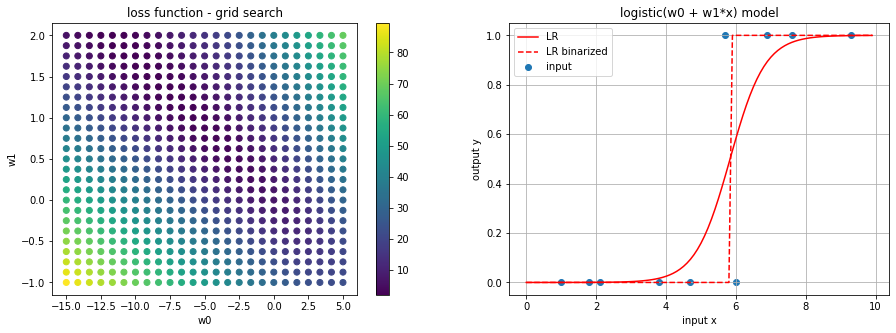

In [4]:
#generate w0-w1 pairs
ww0, ww1 = np.meshgrid(np.linspace(-15, 5, 25), np.linspace(-1, 2, 25))
ww = np.vstack((ww0.ravel(), ww1.ravel()))

#evaluate the loss function for all ww values
z = np.dot(X, ww)
exp_z = np.exp(z)
obj_fn_vals = -np.sum(-np.log(1.0 + exp_z) + y*z, axis=0)

#argmin
ww_argmin = ww[:, np.argmin(obj_fn_vals)]

#logistic function
def logistic_predictions(weights, inputs):
    z = np.dot(inputs, weights)
    return 1.0/(1.0 + np.exp(-z))

#generate query inputs
Xq_orig = np.arange(0, 10, 0.1)[:, np.newaxis]
Xq = extend_to_intercept(Xq_orig)

#evaluate outputs for query inputs
yq = logistic_predictions(ww_argmin, Xq)

#plot
pl.figure(figsize=(15, 5))
pl.subplot(121)
pl.scatter(ww[0, :], ww[1, :], c=obj_fn_vals)
pl.colorbar(); pl.axis('tight'); pl.title('loss function - grid search'); pl.xlabel('w0'); pl.ylabel('w1')
pl.subplot(122)
pl.scatter(X_orig, y, label='input')
pl.plot(Xq_orig, yq, 'r-', label='LR')
pl.plot(Xq_orig, np.round(yq, 0), 'r--', label='LR binarized')
pl.grid(); pl.title('logistic(w0 + w1*x) model'); pl.xlabel('input x'); pl.ylabel('output y'); pl.legend(loc='upper left')

**Exercise 1.2:** Discuss the disadvantages of grid search. 

##Answer
#How many evaluations if X has 100 dimensions? - curse of dimensionality
#One of the major drawbacks of grid search is that when it comes to dimensionality, it suffers when the number of 
#hyperparameters grows exponentially. With as few as four parameters this problem can become impractical, because 
#the number of evaluations required for this strategy increases exponentially with each additional parameter, 
#due to the curse of dimensionality.

### Method 2:

Let us try to evaluate $\underset{w_0, w_1}{\operatorname{argmin}} \text{loss}(w)$ using the **gradient descent algorithm**. We can analytically differentiate the loss function. 

The derivative w.r.t. each weight is,

\begin{equation}
\color{blue}{
    \frac{\partial}{\partial w_d} \text{loss}(w) =  \sum_{i=1}^{N} \bigg( \frac{e^z}{1+e^z} -y_i \bigg) x_{id}  
    }
\end{equation}

for $d \in \{1,2,...,(D+1)\}$

In [5]:
def logistic_loss_and_grad(weights, inputs, targets):

    #derivative of the loss function
    z = np.dot(inputs, weights)
    exp_z = np.exp(z)
    temp = -exp_z/(1 + exp_z) + targets
    dloss = -np.sum(temp*inputs, axis=0)[:, np.newaxis]

    #calculating the loss is optional
    loss = -np.sum(-np.log(1.0 + exp_z) + targets*z)

    return dloss, loss

Let us re-implement the gradient descent algorithm (as it is just 2 lines of code). The update rule is,
\begin{equation}
    w_d \leftarrow w_d - \eta \cdot \frac{\partial}{\partial w_d} \text{loss}(w)
\end{equation}

In [6]:
N, D = X.shape
weights = np.random.random(D)[:, np.newaxis]#1*np.ones(D)[:, np.newaxis]

eta = 0.03
n_iter = 2000

loss_arr = np.empty((1, n_iter)) #for plotting purposes
weights_arr = np.empty((n_iter, D)) #for plotting purposes
for epoch in range(n_iter):
    #save weights for plotting purposes
    weights_arr[epoch, :] = weights.ravel()
    
    #gradient descent
    dloss, loss = logistic_loss_and_grad(weights, X, y)
    weights = weights  - dloss * eta

    #save loss for plotting purposes
    loss_arr[0, epoch] = loss

#plot
Xq = np.arange(0, 10, 0.1)[:, np.newaxis]
Xq = extend_to_intercept(Xq)
yq = logistic_predictions(weights, Xq)

/Users/charlie/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'hold'
  from ipykernel import kernelapp as app


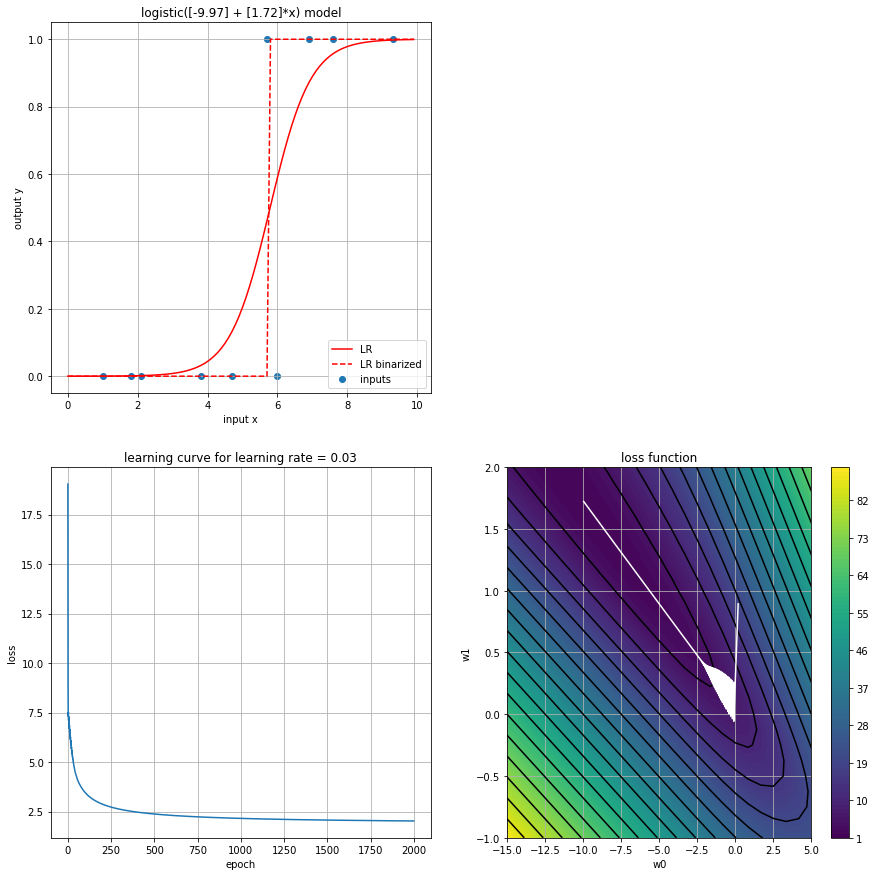

In [7]:
pl.figure(figsize=(15, 15))
pl.subplot(221)
pl.scatter(X[:, 1].ravel(), y, label='inputs')
pl.plot(Xq[:, 1].ravel(), yq, 'r-', label='LR')
pl.plot(Xq[:, 1].ravel(), np.round(yq, 0), 'r--', label='LR binarized')
pl.grid(); pl.title('logistic({} + {}*x) model'.format(np.round(weights[0,:],2), np.round(weights[1,:],2))); 
pl.xlabel('input x'); pl.ylabel('output y'); pl.legend(loc='lower right')

pl.subplot(223)
pl.plot(np.arange(n_iter), loss_arr.ravel())
pl.grid(); pl.title('learning curve for learning rate = {}'.format(eta)); pl.xlabel('epoch'); pl.ylabel('loss')

pl.subplot(224)
pl.contourf(ww0, ww1, obj_fn_vals.reshape(ww0.shape[0], ww0.shape[1]), 100); pl.colorbar()
pl.contour(ww0, ww1, obj_fn_vals.reshape(ww0.shape[0], ww0.shape[1]), 20, colors='k', hold='on')
pl.plot(weights_arr[:, 0], weights_arr[:, 1], c='w')
pl.grid(); pl.title('loss function'); pl.xlabel('w0'); pl.ylabel('w1')
pl.show()

**Exercise 1.3:** Change the learning rate $\eta$ and number of iterations and observe results.

**Exercise 1.4:** Implement L-2 regularization. 

### Apply logistic regression for MNIST dataset 

In [8]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
N, d = mnist.data.shape
print('Total {:d} digits, each has {:d} pixels.'.format(N, d))

Total 70000 digits, each has 784 pixels.


### Consider subset of MNIST, only digit 0 and 1

In [9]:
X_all = mnist.data 
y_all = mnist.target

X0 = X_all[np.where(y_all == '0')[0]] # all digit 0
X1 = X_all[np.where(y_all == '1')[0]] # all digit 1
y0 = np.zeros(X0.shape[0]) # class 0 label 
y1 = np.ones(X1.shape[0])  # class 1 label

X = np.concatenate((X0, X1), axis = 0) # all digits
y = np.concatenate((y0, y1)) # all labels 
#split train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2000)

In [10]:
model = LogisticRegression(C = 1e5) # C is inverse of lam 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_pred.tolist())))

/Users/charlie/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy 99.80 %
